<a href="https://colab.research.google.com/github/gaurigund-13/Deep-Learning/blob/main/Handwritten_Digit_CNN_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Handwritten Digit Classification - Gauri Gund

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Reading the handwritten digit dataset

In [2]:
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtest.shape

(10000, 28, 28)

In [5]:
ytrain.shape

(60000,)

In [6]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Lets see first image of train data

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

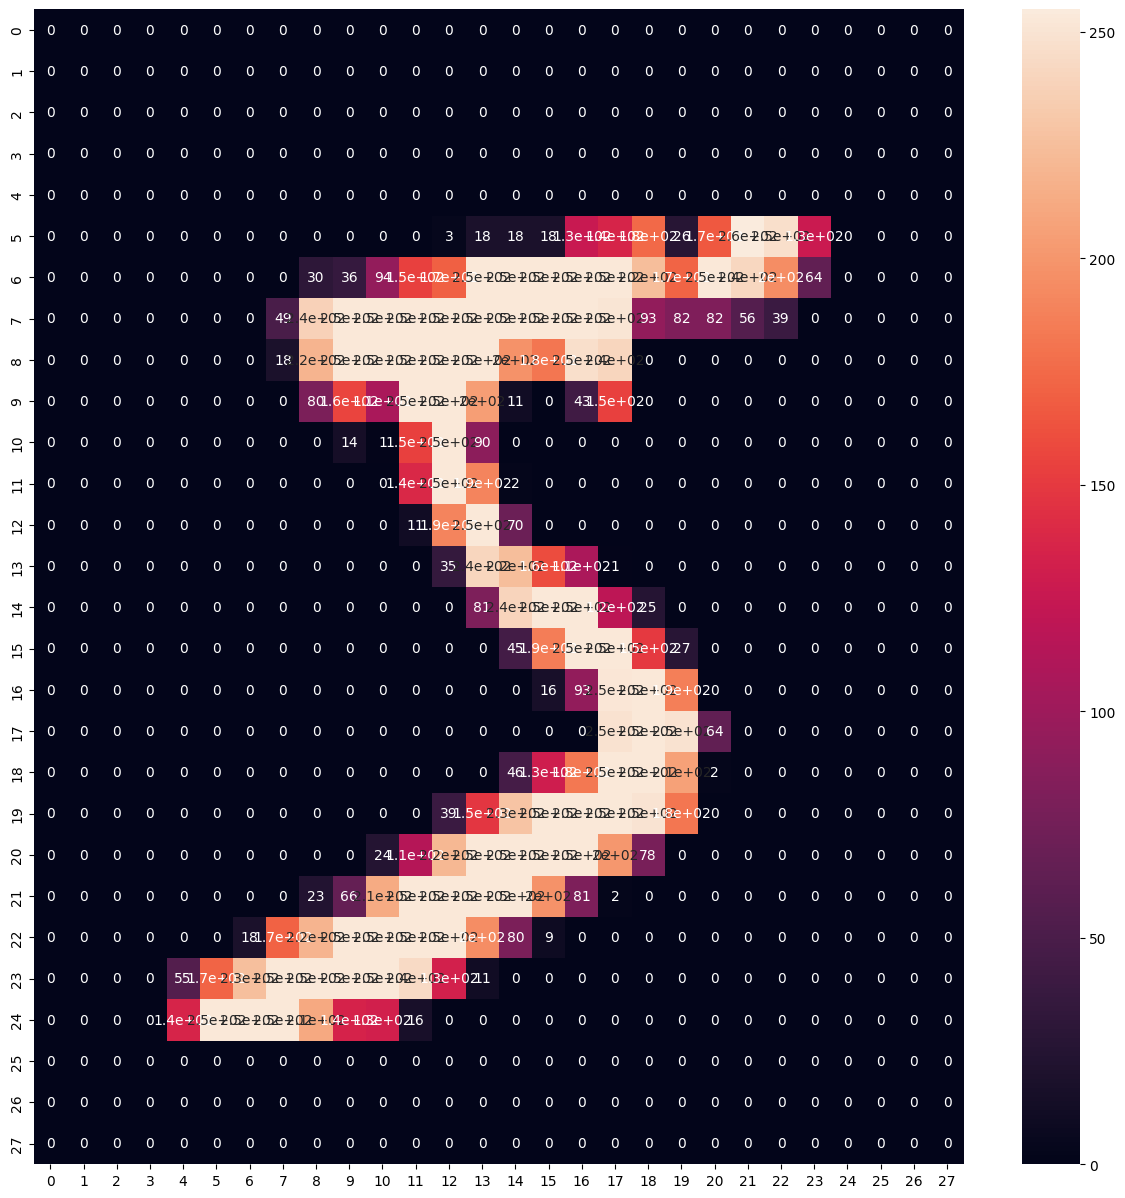

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(xtrain[0],annot= True)
plt.show()

In [11]:
ytrain[0]

5

### Lets see top 5 images from xtrain data

In [13]:
plt.figure(figsize=(10,10))
for i in range(9):
  print(i)

0
1
2
3
4
5
6
7
8


<Figure size 1000x1000 with 0 Axes>

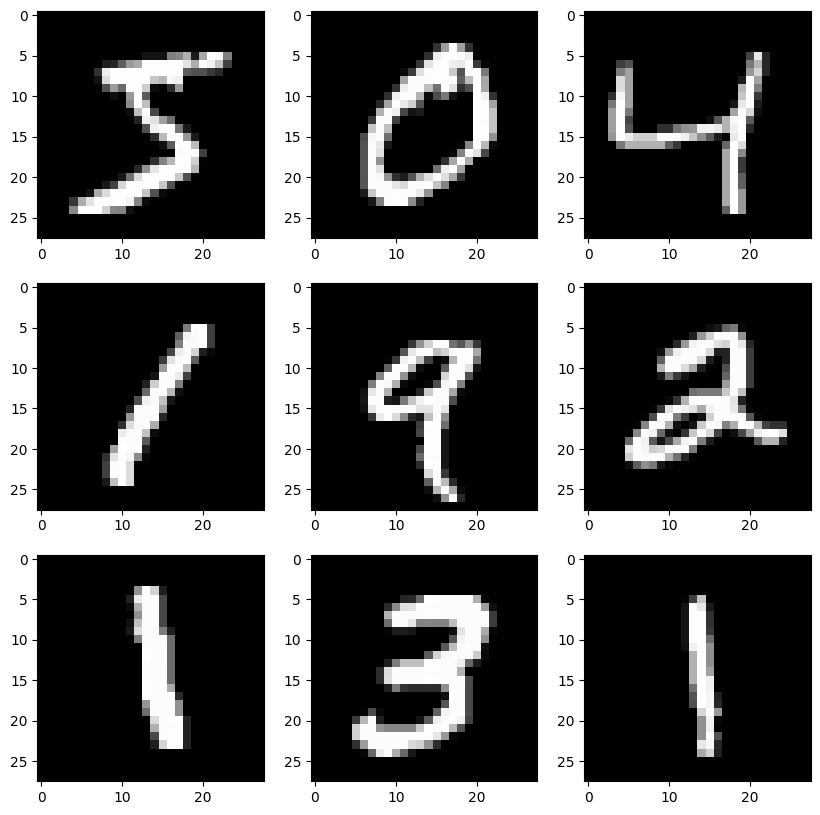

In [15]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3, i+1)
  plt.imshow(xtrain[i], cmap='gray')
plt.show()


In [16]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

* Because i have more than 2 clasess becomes multiclass calssification problem

### Preprocess the train data

In [17]:
# Scale the x data divided by 255
xtrain_sc1 = xtrain.astype('float32')/255
xtest_scl = xtest.astype('float32')/255

In [18]:
# Apply one hot encoding on target feature because it multiclass classification problem
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [19]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [20]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [21]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Create a simple Covnet
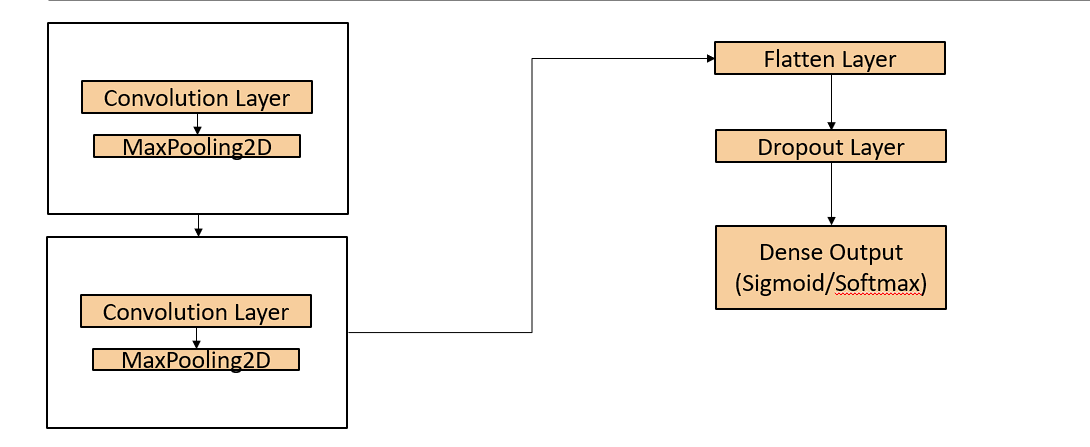

In [24]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dropout, Dense

In [26]:
model = Sequential()

# Add Input Layer
model.add(Input(shape=(28, 28, 1)))

# Add convolution Layer 1
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu' ))

# Add Maxpooling 1
model.add(MaxPool2D(pool_size=(2,2)))

# Add convolution layer 2
model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu' ))

# Add Max Pooling 2
model.add(MaxPool2D(pool_size=(2,2)))

# Add flatten layer
model.add(Flatten())

# Dropout layer
model.add(Dropout(rate=0.5))

# Dense layer Multiclass- Softmax
model.add(Dense(units=10, activation='softmax'))



In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

### Compile the model

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the neural net

In [33]:
hist = model.fit(xtrain_sc1, ytrain_cat, validation_split = 0.1, epochs=15)

Epoch 1/15
1688/1688 [==============================] - 18s 7ms/step - loss: 0.2211 - accuracy: 0.9319 - val_loss: 0.0595 - val_accuracy: 0.9835
Epoch 2/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0829 - accuracy: 0.9743 - val_loss: 0.0440 - val_accuracy: 0.9865
Epoch 3/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0649 - accuracy: 0.9796 - val_loss: 0.0361 - val_accuracy: 0.9903
Epoch 4/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0565 - accuracy: 0.9821 - val_loss: 0.0351 - val_accuracy: 0.9898
Epoch 5/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0494 - accuracy: 0.9845 - val_loss: 0.0339 - val_accuracy: 0.9910
Epoch 6/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0449 - accuracy: 0.9857 - val_loss: 0.0334 - val_accuracy: 0.9912
Epoch 7/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0406 - accuracy: 0.9868 - val_loss: 0.0326 - val_accura

### Plot the learning curve for the model

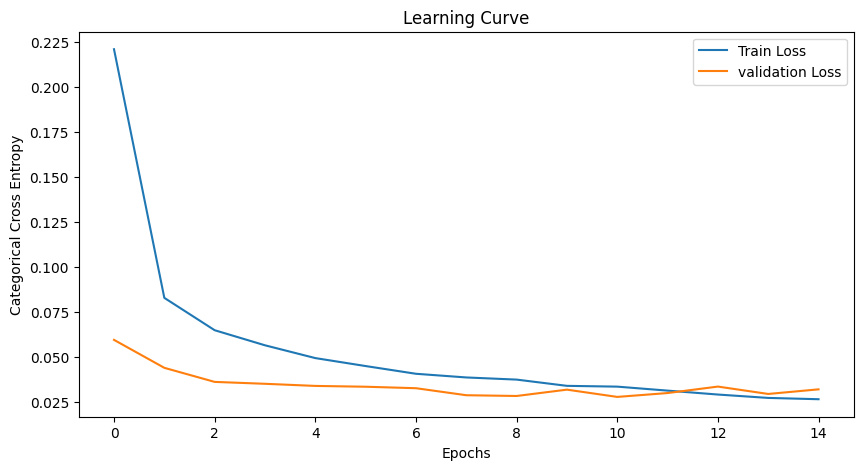

In [34]:
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label = 'validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross Entropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Evaluate model in train and test

In [35]:
model.evaluate(xtrain_sc1, ytrain_cat)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0104 - accuracy: 0.9972


[0.010399248450994492, 0.9971666932106018]

In [36]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.0228 - accuracy: 0.9925


[0.022786544635891914, 0.9925000071525574]

### Predict the probability for train and test

In [37]:
yprob_train = model.predict(xtrain_sc1)
yprob_test = model.predict(xtest_scl)

313/313 [==============================] - 1s 2ms/step


In [38]:
yprob_train[0:5]

array([[2.33067524e-11, 3.92771592e-15, 1.43457876e-11, 2.54691149e-05,
        9.74933991e-15, 9.99974132e-01, 2.93498017e-12, 5.19369436e-10,
        1.18649254e-07, 2.16950923e-07],
       [1.00000000e+00, 2.08935208e-16, 8.01439271e-09, 2.23036040e-13,
        1.12411100e-12, 2.37439652e-13, 3.71590647e-10, 2.24197437e-13,
        9.79640591e-10, 8.09133524e-11],
       [1.00888040e-15, 7.41071460e-07, 2.38619347e-09, 3.52685763e-11,
        9.99994993e-01, 2.49303106e-10, 1.02661389e-13, 2.80101835e-06,
        1.09491560e-09, 1.55608711e-06],
       [2.36336239e-09, 9.99986410e-01, 1.06951106e-07, 5.55050840e-12,
        7.76583238e-06, 2.68107377e-11, 5.36727498e-08, 2.91063520e-06,
        2.72984903e-06, 1.90730609e-09],
       [8.77181338e-16, 3.29207928e-12, 2.25599713e-11, 4.60682936e-10,
        1.09579241e-05, 1.15013554e-12, 1.22113804e-17, 9.21965011e-08,
        7.06616720e-06, 9.99981880e-01]], dtype=float32)

In [39]:
yprob_train[0]

array([2.33067524e-11, 3.92771592e-15, 1.43457876e-11, 2.54691149e-05,
       9.74933991e-15, 9.99974132e-01, 2.93498017e-12, 5.19369436e-10,
       1.18649254e-07, 2.16950923e-07], dtype=float32)

### Predictions for train and test

In [40]:
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [41]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [42]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [43]:
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [44]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Plot the confusion matrix

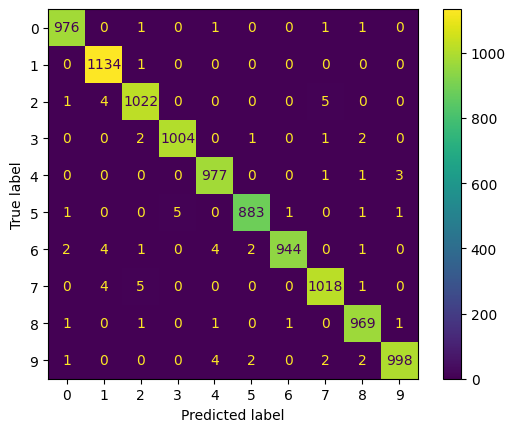

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### Print the classification report

In [49]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Save the keras model for future use

In [50]:
model.save('HandwrittenModel.keras')

### Load the above model

In [51]:
from keras.models import load_model
m = load_model('/content/HandwrittenModel.keras')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             